In [75]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np

In [76]:
dfi=pd.read_csv('/content/diabetes.csv')
dfi.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [77]:
dfi.shape

(768, 9)

In [78]:
dfi['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [79]:
df=dfi.sample(300)

In [80]:
corrm=df.corr().abs()
corrm.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.102621,0.150638,0.006682,0.024742,0.072335,0.034740,0.525953,0.212065
Glucose,0.102621,1.000000,0.104346,0.021667,0.320269,0.251474,0.085725,0.238466,0.443307
BloodPressure,0.150638,0.104346,1.000000,0.275200,0.148753,0.304645,0.101680,0.190323,0.015857
SkinThickness,0.006682,0.021667,0.275200,1.000000,0.480548,0.397063,0.117487,0.156635,0.119463
Insulin,0.024742,0.320269,0.148753,0.480548,1.000000,0.240678,0.126962,0.070859,0.199412
BMI,0.072335,0.251474,0.304645,0.397063,0.240678,1.000000,0.107305,0.014824,0.293722
DiabetesPedigreeFunction,0.034740,0.085725,0.101680,0.117487,0.126962,0.107305,1.000000,0.098629,0.194327
Age,0.525953,0.238466,0.190323,0.156635,0.070859,0.014824,0.098629,1.000000,0.186270
Outcome,0.212065,0.443307,0.015857,0.119463,0.199412,0.293722,0.194327,0.186270,1.000000


In [81]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.443307
BMI                         0.293722
Pregnancies                 0.212065
Insulin                     0.199412
DiabetesPedigreeFunction    0.194327
Age                         0.186270
SkinThickness               0.119463
BloodPressure               0.015857
dtype: float64

In [82]:
X=df.drop('Outcome',axis=1)
y=df['Outcome'].copy()

In [83]:
from sklearn.preprocessing import StandardScaler
sscaler=StandardScaler()
X=sscaler.fit_transform(X)

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [86]:
y_predicted=knn.predict(X_test)

In [87]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,y_predicted)

0.5

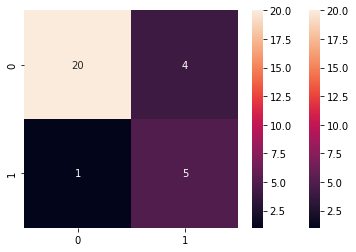

In [88]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_predicted))
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,fmt='g')
plt.show()

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89        24
           1       0.56      0.83      0.67         6

    accuracy                           0.83        30
   macro avg       0.75      0.83      0.78        30
weighted avg       0.87      0.83      0.84        30



In [90]:
from numpy.core.numeric import cross
from sklearn.model_selection import cross_val_predict
predict=cross_val_predict(estimator=knn, X = X, y = y, cv = 3)
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89        24
           1       0.56      0.83      0.67         6

    accuracy                           0.83        30
   macro avg       0.75      0.83      0.78        30
weighted avg       0.87      0.83      0.84        30



In [91]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=3)
knn_gscv.fit(X, y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [92]:
knn_gscv.cv_results_['rank_test_score']

array([15, 22, 24, 18, 21, 23, 15, 12, 13, 18, 10, 20, 13, 15,  4, 10,  4,
        4,  7,  9,  8,  3,  1,  1], dtype=int32)

In [93]:
knn_gscv.best_params_

{'n_neighbors': 23}

In [94]:
knn_gscv.best_score_

0.7333333333333334

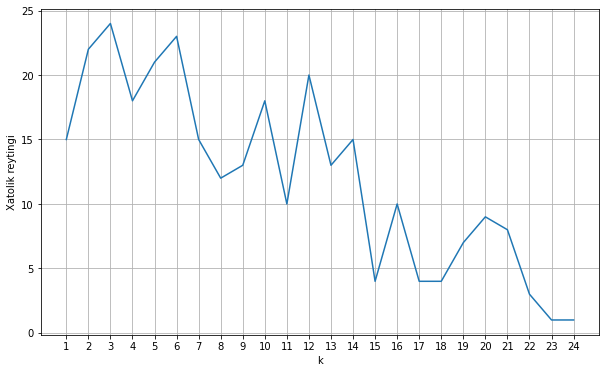

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()